In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

### Part-1

Implement a simple quantum operation with Cirq or Pennylane:
- With 5 qubits 
- Apply Hadamard operation on every qubit 
- Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
- SWAP (0, 4) 
- Rotate X with pi/2 on any qubit 
- Plot the circuit 

(<Figure size 1000x600 with 1 Axes>, <Axes: >)
The measurement probabilities are: [0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125]


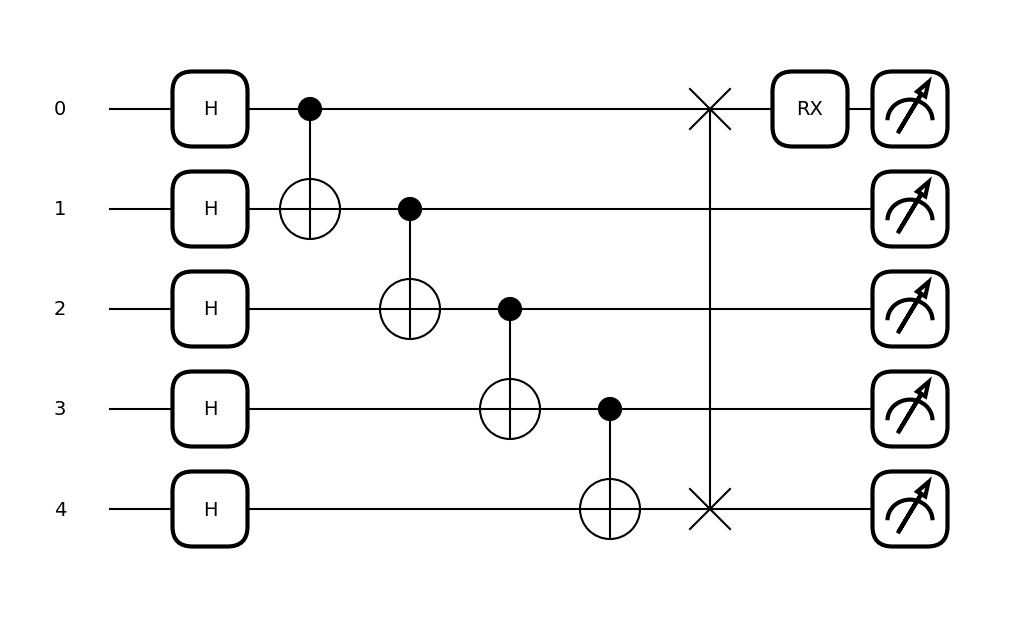

In [2]:
n = 5
dev = qml.device('lightning.qubit', wires = n)
@qml.qnode(dev)
def task_1_1(theta):
    for i in range(n): qml.Hadamard(i)
    for i in range(n-1): qml.CNOT((i,i+1))
    qml.SWAP((0,4))
    qml.RX(theta, 0)
    return qml.probs(wires = range(n))

print(qml.draw_mpl(task_1_1)(np.pi/2))
print(f"The measurement probabilities are: {task_1_1(np.pi/2)}")

2) Implement a second circuit with a framework of your choice:
- Apply a Hadmard gate to the first qubit
- rotate the second qubit by pi/3 around X
- Apply Hadamard gate to the third and fourth qubit
- Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>


**Note**: The 2nd part of task_1's b part: "rotate the second qubit by pi/3 around X" had me confused. To my understanding rotate **around** the X axis means applying an `RZ` operation. But if it simply meant using the `RY` gate then comment the 2nd line and uncomment the follwing line of the function `task_1_2`

(<Figure size 700x600 with 1 Axes>, <Axes: >)
 The measurement probabilities of the ancillary qubit is: [0.75 0.25]


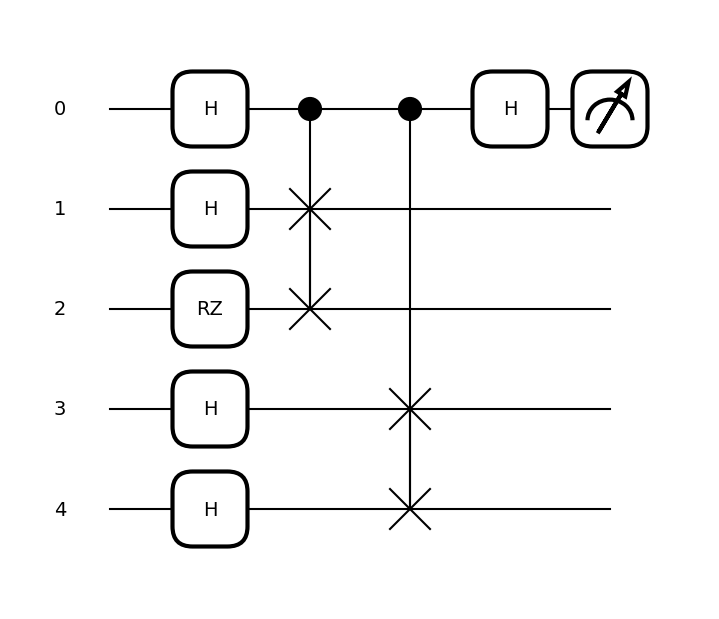

In [3]:
n = 5
dev = qml.device('lightning.qubit', wires = n)
# I will treat the 0th qubit as ancillary qubit for SWAP test
@qml.qnode(dev)
def task_1_2(theta):
    qml.Hadamard(1)
    qml.RZ(theta,wires=2) 
    
    for i in [3,4,0]:qml.Hadamard(wires=i)
    qml.CSWAP(wires=[0,1,2])
    qml.CSWAP(wires=[0,3,4])
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

print(qml.draw_mpl(task_1_2)(np.pi/3))
print(f" The measurement probabilities of the ancillary qubit is: {task_1_2(np.pi/3)}")